In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
sample_submit_df = pd.read_csv('./data/sample_submit.csv')

In [4]:
train_df.head()

,id,age,sex,bmi,children,smoker,region,charges
0,0,26,male,32.665465,3,no,southeast,0
1,1,41,male,29.798725,1,no,southwest,0
2,2,28,male,32.722029,0,yes,northwest,1
3,3,20,female,38.429831,2,no,southeast,0
4,4,45,female,29.641854,1,no,northwest,0


In [5]:
train_df = train_df.drop(columns=['id'])

In [6]:
train_df.describe()

,age,bmi,children,charges
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,38.985000,32.424376,1.014375,0.306250
std,13.555012,5.766915,1.259031,0.628656
min,18.000000,20.627626,0.000000,0.000000
25%,27.000000,28.634267,0.000000,0.000000
50%,40.000000,32.268786,1.000000,0.000000
75%,50.000000,37.069581,2.000000,0.000000
max,64.000000,47.290644,5.000000,2.000000


In [7]:
train_df.describe(include=['O'])

,sex,smoker,region
count,1600,1600,1600
unique,2,2,4
top,male,no,northeast
freq,841,1261,414


In [8]:
train_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

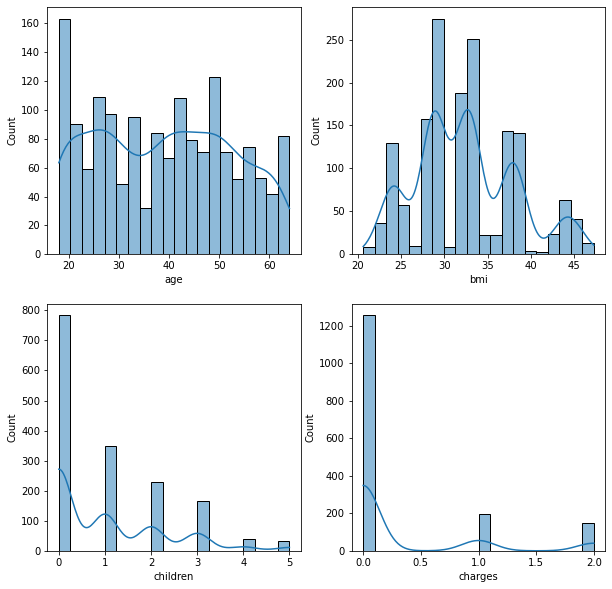

In [34]:
fig, axarr = plt.subplots(2, 2 , figsize=(10, 10)) 
sns.histplot(train_df.age, bins=20, kde=True, ax=axarr[0][0])
sns.histplot(train_df.bmi, bins=20, kde=True, ax=axarr[0][1])
sns.histplot(train_df.children, bins=20, kde=True, ax=axarr[1][0])
sns.histplot(train_df.charges, bins=20, kde=True, ax=axarr[1][1])
plt.show()

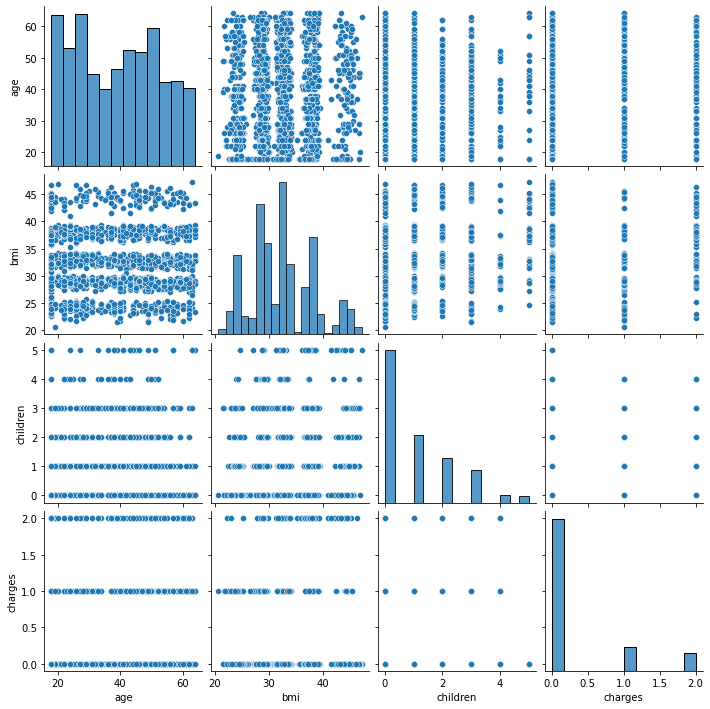

In [47]:
sns.pairplot(train_df[['age', 'bmi', 'children','charges']])
plt.show()

/Users/takumisetoyama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/takumisetoyama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/takumisetoyama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

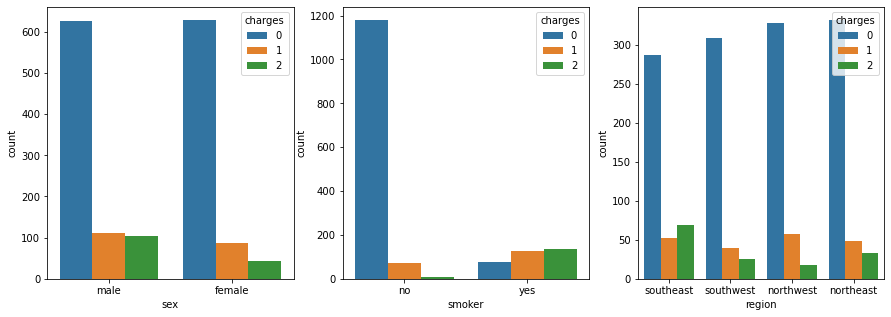

In [25]:
fig, axarr = plt.subplots(1, 3 , figsize=(15, 5)) 
sns.countplot(train_df['sex'], hue=train_df['charges'], ax=axarr[0])
sns.countplot(train_df['smoker'], hue=train_df['charges'], ax=axarr[1])
sns.countplot(train_df['region'], hue=train_df['charges'], ax=axarr[2])
plt.show()

/Users/takumisetoyama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


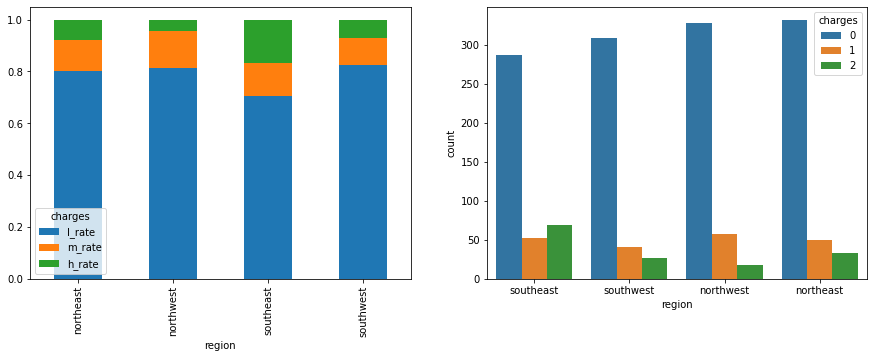

In [11]:
# クロス集計表の作成
cross_el = pd.crosstab(train_df['region'], train_df['charges'], margins = True)
l_rate = cross_el[0] / cross_el['All']
m_rate = cross_el[1] / cross_el['All']
h_rate = cross_el[2] / cross_el['All']
cross_el['l_rate'] = l_rate
cross_el['m_rate'] = m_rate
cross_el['h_rate'] = h_rate
cross_el = cross_el.drop(index=['All'])

# 積み上げ棒グラフに使用したいカラムだけのDataFrameを作成
df_bar = cross_el[['l_rate', 'm_rate','h_rate']]


fig, axarr = plt.subplots(1, 2 , figsize=(15, 5)) 
# 積み上げ棒グラフを作成
df_bar.plot.bar(stacked=True, ax=axarr[0])

sns.countplot(train_df['region'], hue=train_df['charges'], ax=axarr[1])

# グラフの表示
plt.show()

/Users/takumisetoyama/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


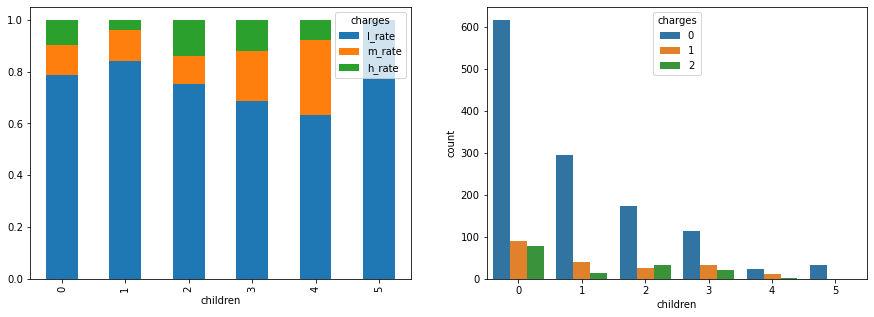

In [12]:
# クロス集計表の作成
cross_el = pd.crosstab(train_df['children'], train_df['charges'], margins = True)
l_rate = cross_el[0] / cross_el['All']
m_rate = cross_el[1] / cross_el['All']
h_rate = cross_el[2] / cross_el['All']
cross_el['l_rate'] = l_rate
cross_el['m_rate'] = m_rate
cross_el['h_rate'] = h_rate
cross_el = cross_el.drop(index=['All'])

# 積み上げ棒グラフに使用したいカラムだけのDataFrameを作成
df_bar = cross_el[['l_rate', 'm_rate','h_rate']]


fig, axarr = plt.subplots(1, 2 , figsize=(15, 5)) 
# 積み上げ棒グラフを作成
df_bar.plot.bar(stacked=True, ax=axarr[0])

sns.countplot(train_df['children'], hue=train_df['charges'], ax=axarr[1])

# グラフの表示
plt.show()